##### Title: Final Project
##### Author: Jerock Kalala
##### Date: March 4th 2023
##### Modified By: --
##### Project Milestone:



You need to get the data into a usable format and perform at least three different aspects of feature engineering (depending on what kind of model you plan to build). If the data is a PDF, you’ll use the technique you’ve learned so far to extract the text (I suggest this approach if you can find suitable PDF data). If the data is a CSV, it’ll be easier to ingest the data.
Once you have the data, you’ll use at least three different feature engineering techniques to understand your corpus.

Examples
- Normalize the corpus, including converting to lower case and removing stop words
- Bag of Words modeling
- Bag of N-Grams modeling
- Topic modeling
- Clustering

In [2]:
import re
import nltk
import random
import pandas as pd
import numpy as np
import predictions as predictions
import seaborn as sns
import spacy
from spacy.util import minibatch
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn import metrics
%matplotlib inline

#### Data Collection & Pre-Processing

In [3]:
corpus = pd.read_csv("E:\\Bellevue\\Winter_2022\\DSC 360 Data Mining Text Analytics an\\Term project\\2emails.csv")
corpus.head()

,Message,Category
0,Subject: naturally irresistible your corporate...,spam
1,Subject: the stock trading gunslinger fanny i...,spam
2,Subject: unbelievable new homes made easy im ...,spam
3,Subject: 4 color printing special request add...,spam
4,"Subject: do not have money , get software cds ...",spam


In [4]:
corpus.dtypes

Message     object
Category    object
dtype: object

- First, We'll need to know the dataset and the data characteristics:

In [5]:
print(corpus.shape)
print("The shape is: ", corpus.shape, "\n")
#Checking the type of data
corpus.info()

(5734, 2)
The shape is:  (5734, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5734 entries, 0 to 5733
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Message   5730 non-null   object
 1   Category  5728 non-null   object
dtypes: object(2)
memory usage: 89.7+ KB


- Checking for missing data and duplicate data --drop them

In [6]:
#check for duplicates and remove them
corpus.drop_duplicates(inplace=True)

#replace the null value with null string
new_corpus = corpus.where((pd.notnull(corpus)), '')

#check if we still have any missing data
corpus.isnull().sum()


Message     1
Category    3
dtype: int64

In [7]:
check_null = corpus['Message'].isnull().sum()
check_nan = corpus['Category'].isnull().sum()
print("Number of empty message: ", check_null)
print("Number of empty Category: ", check_nan)

Number of empty message:  1
Number of empty Category:  3


In [8]:
corpus['Message'] = corpus['Message'].fillna("No Message")
corpus['Category'] = corpus['Category'].fillna(0)

In [9]:
#Checking the actual shape

print(corpus.shape)
print(new_corpus.shape)

check_null = corpus['Message'].isnull().sum()
check_nan = corpus['Category'].isnull().sum()
print("Number of empty message: ", check_null)
print("Number of empty Category: ", check_nan)

(5698, 2)
(5698, 2)
Number of empty message:  0
Number of empty Category:  0


- Label encoding

In [10]:
#label mails
corpus.loc[new_corpus['Category'] == 'spam', 'Category'] =0
corpus.loc[new_corpus['Category'] == 'ham', 'Category'] = 1

#Here is the observation:
print("1. In our dataset, we have {} of emails" .format(new_corpus.shape[0]))
print("2. category = 1 means a spam email and category =0 means a ham email")

1. In our dataset, we have 5698 of emails
2. category = 1 means a spam email and category =0 means a ham email


In [11]:
corpus.head()

,Message,Category
0,Subject: naturally irresistible your corporate...,0
1,Subject: the stock trading gunslinger fanny i...,0
2,Subject: unbelievable new homes made easy im ...,0
3,Subject: 4 color printing special request add...,0
4,"Subject: do not have money , get software cds ...",0


- Defining the cleaning function

In [12]:
#normalize function

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('English')

def normalize_document(doc):
    # lowercase and remove special characters\whitespace
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    #tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    doc = re.sub('\n',' ',doc)
    return doc

normalize_corpus = np.vectorize(normalize_document)

def clean_mails(doc):
    doc = doc.str.replace('[^\w\s]', '', regex=True)
    doc = doc.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    return doc

def cleaning(doc):
    #remove punctuation
  text = [char for char in doc if char not in string.punctuation]
  text = ''.join(text)
    #convert all text to lower case
  text = text.lower()
    #remove stop_words
  text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
  return doc

#new_corpus['email'] = new_corpus['Message'].apply(cleaning)

- Cleaning our data

In [13]:
#Let's apply the function to clean our data
new_corpus['Mail'] = normalize_corpus(corpus['Message'])
new_corpus.head(5)

,Message,Category,Mail
0,Subject: naturally irresistible your corporate...,spam,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,spam,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,spam,subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,spam,subject color printing special request additio...
4,"Subject: do not have money , get software cds ...",spam,subject money get software cds software compat...


- Tokenization

In [14]:
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')
new_corpus['Mail_token'] = new_corpus['Mail'].apply(regexp.tokenize)
new_corpus.head()

,Message,Category,Mail,Mail_token
0,Subject: naturally irresistible your corporate...,spam,subject naturally irresistible corporate ident...,"[subject, naturally, irresistible, corporate, ..."
1,Subject: the stock trading gunslinger fanny i...,spam,subject stock trading gunslinger fanny merrill...,"[subject, stock, trading, gunslinger, fanny, m..."
2,Subject: unbelievable new homes made easy im ...,spam,subject unbelievable new homes made easy im wa...,"[subject, unbelievable, new, homes, made, easy..."
3,Subject: 4 color printing special request add...,spam,subject color printing special request additio...,"[subject, color, printing, special, request, a..."
4,"Subject: do not have money , get software cds ...",spam,subject money get software cds software compat...,"[subject, money, get, software, cds, software,..."


#### Bag of Words

In [15]:
#BOW

print('Bag of Words Model')
# starting on page 208
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
count_vector = CountVectorizer(min_df=0., max_df=1.)
count_vector_matrix = count_vector.fit_transform(new_corpus['Mail'])

# view non-zero feature positions in the sparse matrix
print("\nNon-zero feature positions in the sparse matrix:")
print(count_vector_matrix, '\n')

# view dense representation (warning - might give a memory error if the data is too big)
count_vector_matrix = count_vector_matrix.toarray()
print("\nDense representation of the matrix:")
print(count_vector_matrix, '\n')

# get all unique words in the corpus
vocab = count_vector.get_feature_names_out()

#show document feature vectors
count_vector_df = pd.DataFrame(count_vector_matrix, columns=vocab)
print("\nAll document feature vectors:")
#print(count_vector_df, '\n')


Bag of Words Model

Non-zero feature positions in the sparse matrix:
  (0, 30043)	1
  (0, 21089)	1
  (0, 16569)	1
  (0, 7805)	1
  (0, 15424)	1
  (0, 18864)	1
  (0, 25698)	1
  (0, 14406)	1
  (0, 25822)	1
  (0, 7036)	3
  (0, 19377)	2
  (0, 13163)	1
  (0, 30307)	1
  (0, 15966)	1
  (0, 16614)	1
  (0, 13822)	2
  (0, 5794)	1
  (0, 18676)	3
  (0, 30024)	1
  (0, 29673)	1
  (0, 22559)	1
  (0, 33726)	2
  (0, 19155)	2
  (0, 30742)	1
  (0, 20761)	2
  :	:
  (5697, 13946)	1
  (5697, 20531)	1
  (5697, 5661)	1
  (5697, 22539)	2
  (5697, 19347)	1
  (5697, 3471)	9
  (5697, 28641)	1
  (5697, 11076)	1
  (5697, 10865)	1
  (5697, 15116)	1
  (5697, 11868)	1
  (5697, 17997)	1
  (5697, 29532)	1
  (5697, 10866)	1
  (5697, 18191)	1
  (5697, 32990)	1
  (5697, 6369)	1
  (5697, 27790)	1
  (5697, 11260)	5
  (5697, 33886)	1
  (5697, 27994)	1
  (5697, 15318)	1
  (5697, 31628)	1
  (5697, 8113)	1
  (5697, 9125)	1 


Dense representation of the matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0

- N-Grams

In [16]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(new_corpus['Mail'])
bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names_out()
bv_df = pd.DataFrame(bv_matrix, columns=vocab)
#print(bv_df, '\n')

- Term Frequency-Inverse Document Frequency

In [17]:
#Tf-Idf Transformer
from sklearn.feature_extraction.text import TfidfTransformer

print('Tfidf transformer:')
term = TfidfTransformer(norm = 'l2', use_idf=True)
term_matrix = term.fit_transform(count_vector_matrix)
term_matrix = term_matrix.toarray()
vocab = count_vector.get_feature_names_out()
print(pd.DataFrame(np.round(term_matrix, 2), columns=vocab), '\n')

Tfidf transformer:
       00  000  0000  00000000  0000000000  0000102789  0000104281  \
0     0.0  0.0   0.0       0.0         0.0         0.0         0.0   
1     0.0  0.0   0.0       0.0         0.0         0.0         0.0   
2     0.0  0.0   0.0       0.0         0.0         0.0         0.0   
3     0.0  0.0   0.0       0.0         0.0         0.0         0.0   
4     0.0  0.0   0.0       0.0         0.0         0.0         0.0   
...   ...  ...   ...       ...         ...         ...         ...   
5693  0.0  0.0   0.0       0.0         0.0         0.0         0.0   
5694  0.0  0.0   0.0       0.0         0.0         0.0         0.0   
5695  0.0  0.0   0.0       0.0         0.0         0.0         0.0   
5696  0.0  0.0   0.0       0.0         0.0         0.0         0.0   
5697  0.0  0.0   0.0       0.0         0.0         0.0         0.0   

      0000104486  0000104631  0000104730  ...  zwzm  zxghlajf  zyban  zyc  \
0            0.0         0.0         0.0  ...   0.0       0.0  

#### Model

In [18]:
df = new_corpus.drop(['Message'], axis=1)
df.fillna(0)
df.head(20)

,Category,Mail,Mail_token
0,spam,subject naturally irresistible corporate ident...,"[subject, naturally, irresistible, corporate, ..."
1,spam,subject stock trading gunslinger fanny merrill...,"[subject, stock, trading, gunslinger, fanny, m..."
2,spam,subject unbelievable new homes made easy im wa...,"[subject, unbelievable, new, homes, made, easy..."
3,spam,subject color printing special request additio...,"[subject, color, printing, special, request, a..."
4,spam,subject money get software cds software compat...,"[subject, money, get, software, cds, software,..."
5,spam,subject great nnews hello welcome medzonline s...,"[subject, great, nnews, hello, welcome, medzon..."
6,spam,subject hot play motion homeland security inve...,"[subject, hot, play, motion, homeland, securit..."
7,spam,subject save money buy getting thing tried cia...,"[subject, save, money, buy, getting, thing, tr..."
8,spam,subject undeliverable home based business grow...,"[subject, undeliverable, home, based, business..."
9,spam,subject save money buy getting thing tried cia...,"[subject, save, money, buy, getting, thing, tr..."


- Plot --Class distribution

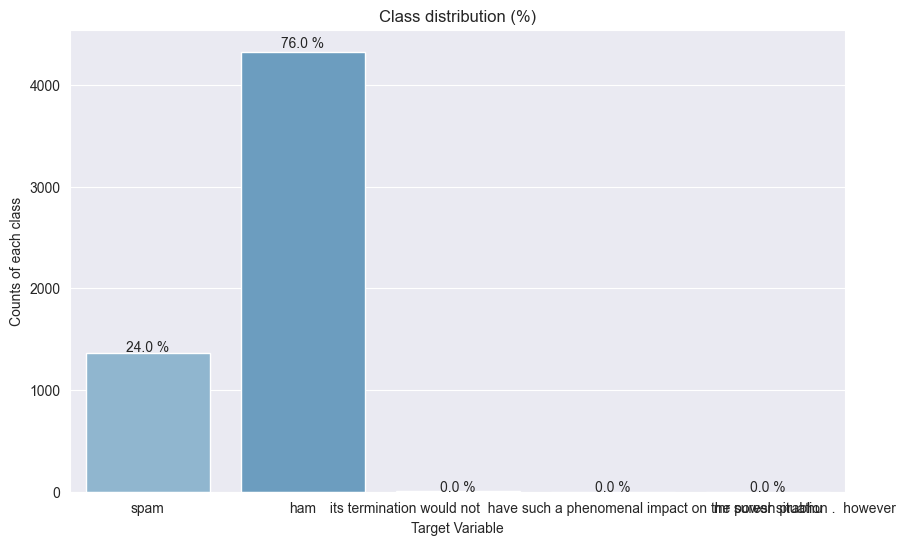

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
f = sns.countplot(x = df['Category'], palette="Blues_d")
plt.xlabel('Target Variable')
plt.ylabel('Counts of each class')
plt.title('Class distribution (%)')
for p in f.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{round(height/df.shape[0], 2)*100} %', (x + width/2, y + height*1.01), ha='center')

- Converting words to vectors using TF-IDF Vectorizer

In [20]:
#convert the Mail data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

classif = LogisticRegression()
vectorizer = TfidfVectorizer()

#vectors = vectorizer.fit_transform(corpus[])
vectors = vectorizer.fit_transform(df['Mail'])
#features = vectors
#print("This is the vector shape: ", vectors.shape)
print("This is the vector shape: ", vectors.shape)

This is the vector shape:  (5698, 34928)


- Splitting into training and test set

In [21]:
from sklearn.model_selection import train_test_split

z = df['Mail']
w = df['Category'].values.astype('U')
mail_train, mail_test, category_train,category_test = train_test_split(z, w, test_size = 0.27, random_state = 42)
print('Data_train :', len(mail_train))
print('Data_test  :', len(mail_test))
print('Target_train :', len(category_train))
print('Target_test  :', len(category_test))

Data_train : 4159
Data_test  : 1539
Target_train : 4159
Target_test  : 1539


In [22]:
#Create Model Pipeline

from sklearn.pipeline import Pipeline

model = Pipeline([('Vectorizer',vectorizer),('Classifier',classif)])
model.fit(mail_train, category_train)

Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('Classifier', LogisticRegression())])

- Prediction on test data

In [23]:
# predict on the test set
y_pred = model.predict(mail_test)
x_pred = model.predict(mail_train)
y_pred[:20]

array(['ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam',
       'ham', 'spam'], dtype='<U92')

In [25]:
example_text = ["I love to texting you every monday", "This was not an amazing place. I'm very happy now"]
example_result = model.predict(example_text)

example_result

array(['spam', 'ham'], dtype='<U92')

- The accuracy score

In [26]:
accuracy_on_test_data = accuracy_score(category_test, y_pred )
accuracy_on_training_data = accuracy_score(category_train, x_pred )
print("For training data, the accuracy score is :", '%.2f' % (accuracy_on_training_data * 100), "%")
print("For test data, the accuracy score is :", '%.2f' % (accuracy_on_test_data * 100), "%")

For training data, the accuracy score is : 99.86 %
For test data, the accuracy score is : 98.25 %


- Testing confusion matrix

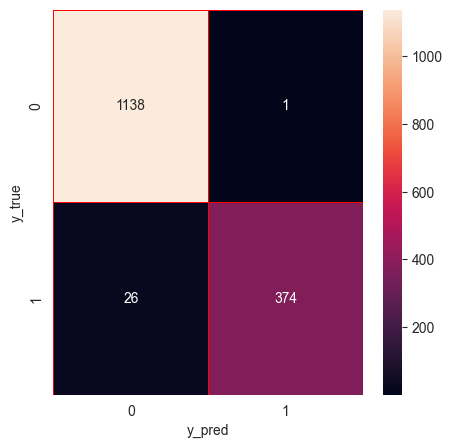

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Naive Bayes
y_pred_nb = model.predict(mail_test)
y_true_nb = category_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

This is it.
From the confusion matrix, we can see that the Pipeline model is balanced.
We have successfully created a spam classifier

Jerock Kalala
Professor David Kinney
DSC350 Data Mining: Text Analytics
04 March 2023

### Project Milestone 5 – Complete your project.
“Finalize your model and create a 500-page write-up (or presentation) of your observations and conclusions for the project. Please restate your objectives and then show you achieved them programmatically.

We have been asked to work on any Natural language Processing (NLP), and I decided to work on implementing an email spam classifier. For this project, I used the .csv  dataset from https://www.kaggle.com/datasets/ozlerhakan/spam-or-not-spam-dataset?select=spam_or_not_spam.csv containing a total of 5734 emails.
Nowadays, it's likely that everyone knows what Spam means, in the context of e-mail. The use of the word "Ham", on the other hand, is relatively new and sometimes confusing. "Ham" is e-mail that is not Spam. In other words, "non-spam", or "good mail". It should be considered a shorter, snappier synonym for "non-spam".
In this project, we went through the following steps:


### Data processing:
•	Import the required packages: We would require some basic machine learning modules such as numpy, pandas, and matplotlib. Along with these, we would require some sklearn models and features.
•	Loading the Dataset: The dataset we loaded has 5734 email samples along with 2 unique labels namely, spam and ham.
•	Remove the unwanted data columns.
•	Preprocessing and Exploring the Dataseta
•	Build word cloud to see which message is spam and which is not.
•	Remove the stop words and punctuations.
•	Tokenized data
•	Building Bag of Words
•	Convert the text data into vectors.

### Building an email spam classification model

This is the most important step that involves building and training the model for the dataset we created in the previous steps.
•	Split the data into train and test datasets: Separating the x and y data as the email text and labels respectively.
•	Use Sklearn built-in classifiers to build the model
•	Train the data on the model:
•	Make predictions on new data

The final step includes computing the overall accuracy of our model on the testing dataset. We ended up achieving an accuracy of  99.86%  which is great!!

In this project, we learned how to o build and run our model, comparing our predictions against the actual output. Finally, we tested our model using count vectorization.

This project was a good challenge, and a great opportunity to put into practice what we learned throughout the semester.  We’ve only scratched the surface of what we can achieve with machine learning for our email spam detector given the fact that the semester has only 12 weeks from a lot of material. We’ll keep working to improve what we couldn’t do well.


## Using other classification methods (Just for practice and comparison)

In [27]:
text = pd.DataFrame(df['Mail'])
label = pd.DataFrame(df['Category'])

In [28]:
## Counting how many times a word appears in the dataset

from collections import Counter

total_counts = Counter()
for i in range(len(text)):
    for word in text.values[i][0].split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

Total words in data set:  34995


In [29]:
# Sorting in decreasing order (Word with highest frequency appears first)
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab[:60])

['.', '-', 'enron', 'ect', '>', 'subject', ',', 'vince', '/', ':', 'hou', 'com', 'please', 'kaminski', 'would', 'cc', 'j', 'pm', '*', '_', 'time', 'research', 'thanks', 'know', 'may', 'group', '?', 'information', 'new', 'e', 'energy', '@', 'like', 'risk', 'one', "'", 'business', 'get', 'email', 'power', 'let', 'us', ')', 'also', 'message', 'mail', 'need', 'meeting', '(', 'corp', 'shirley', 'company', 'http', '"', 'edu', 'houston', 'forward', 'management', 'market', 'work']


In [80]:
# Mapping from words to index

vocab_size = len(vocab)
word2idx = {}
#print vocab_size
for i, word in enumerate(vocab):
    word2idx[word] = I

34995

In [31]:
# Text to Vector
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)

In [32]:
# Convert all titles to vectors
word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
for i, (_, text_) in enumerate(text.iterrows()):
    word_vectors[i] = text_to_vector(text_[0])

word_vectors.shape

(5698, 34995)

- Converting words to vectors using TF-IDF vectorizer

In [33]:
#convert the text data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df['Mail'])
vectors.shape

(5698, 34928)

In [34]:
#features = word_vectors
features = vectors

In [35]:
#split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(features, df['Category'], test_size=0.15, random_state=111)

- Classifying using sklearn's pre-built classifiers

In [36]:
#import sklearn packages for building classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [44]:
#initialize multiple classification models
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [65]:
#create a dictionary of variables and models
clfs = {'Support Vector Classifier:' : svc,'K Neighbors Classifier : ' : knc, 'Multinomial naive Bayes: ': mnb, 'Decision Tree Classif: ': dtc,
        'Logistic Regression  :': lrc, 'Random Forest Classif:': rfc}

In [66]:
#fit the data onto the models
def train(clf, features, targets):
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [67]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

- Predictions

In [68]:
pred_scores_word_vectors

[('Support Vector Classifier:', [0.9883040935672515]),
 ('K Neighbors Classifier : ', [0.9695906432748538]),
 ('Multinomial naive Bayes: ', [0.9812865497076023]),
 ('Decision Tree Classif: ', [0.9438596491228071]),
 ('Logistic Regression  :', [0.968421052631579]),
 ('Random Forest Classif:', [0.9742690058479532])]

- Model Prediction

In [69]:
#write functions to detect if the message is spam or not
def find(x):
    if x == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [73]:
newtext = ["I love to texting you every monday", "This was not an amazing place. I'm very happy now"]
integers = vectorizer.transform(newtext)

In [75]:
x = mnb.predict(integers)
find(x)

Message is NOT Spam


C:\Users\jeroc\AppData\Local\Temp\ipykernel_21700\579331721.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if x == 1:
